# Dual PRF correction of waeather radar data: 

This example uses the dual PRF dealiasing method to correct the errors related to weather radar Nyquist extension techniques. The original code was written by [Addison Alford](https://github.com/aaddisonalford), and the github repository available at this [link](https://github.com/aaddisonalford/processorCorrect.git).

---

## Overview

Staggered Pulse Repetition Time (PRT) is a technique employed by weather radar wherein the PRF/PRT is changed from pulse-pair to pulse-pair. Using the Doppler velocity information from each PRF/PRT time series, the individual pulse-pairs can use the corresponding sample at the other PRF/PRT to dealias the Doppler velocities into a larger Nyquist interval. Due to enhanced phase noise from combining the two pulse-pairs, errors (here referred to as "processor errors") are often found in regions of high shear, low signal-to-noise ratio, and high spectrum width.

Similarly, dual PRF processing changes PRF/PRT but from azimuth to azimuth. A former azimuth is assumed to be representative of the Doppler velocities in the current azimuth (i.e., actual flow is assumed to be approximately constant from azimuth to azimuth) and is used to dealias the current azimuth. Errors can be found, particularly in regions of strong shear.

This software can be used to correct such processor errors. The Python ARM Radar Toolkit is used to read in a particular radar file and pass the pre-dealiased Doppler velocity field to processorCorrect.

## Imports

In [15]:
import pyart
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import processorCorrect

## Read and plot reflectivity and velocity fields for a sample file 

/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)


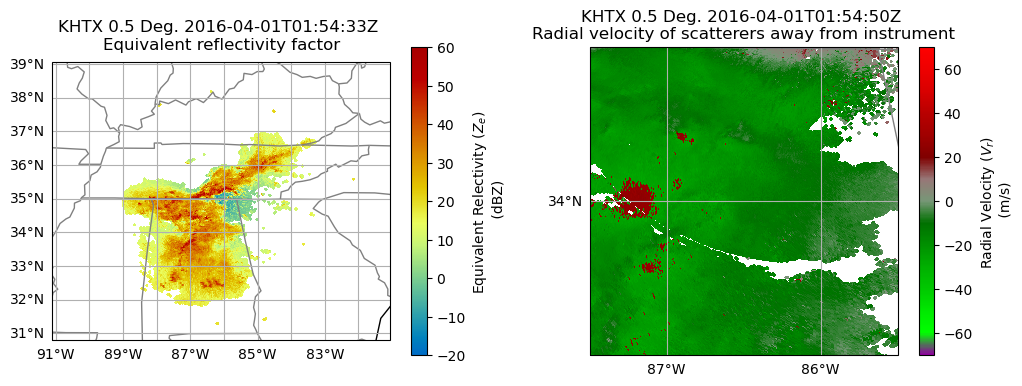

In [18]:
aws_nexrad_level2_file = (
    "s3://noaa-nexrad-level2/2016/04/01/KHTX/KHTX20160401_015433_V06.gz"
)


 'noaa-nexrad-level2/2023/06/14/KVAX/KVAX20230614_203140_V06',

    
radar = pyart.io.read_nexrad_archive(aws_nexrad_level2_file)


fig = plt.figure(figsize=(12, 4))
display = pyart.graph.RadarMapDisplay(radar)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

display.plot_ppi_map(
    "reflectivity",
    sweep=0,
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

ax = plt.subplot(122, projection=ccrs.PlateCarree())

display.plot_ppi_map(
    "velocity",
    sweep=1,
    ax=ax,
    colorbar_label="Radial Velocity ($V_{r}$) \n (m/s)",
    vmin=-70,
    vmax=70,
    min_lon=-87.5,
    max_lon=-85.5,
    min_lat=33,
    max_lat=35,
    cmap='pyart_NWSVel'
)

In [32]:
radar1 = processorCorrect.errorCorrect(radar,velField = 'velocity',fnyq = 36.35000038146973,nyqL=8.760000228881836,nyqH=27.59000015258789,method = 'staggered')

/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:411: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:416: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


TOTAL TIME 219.00


/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)


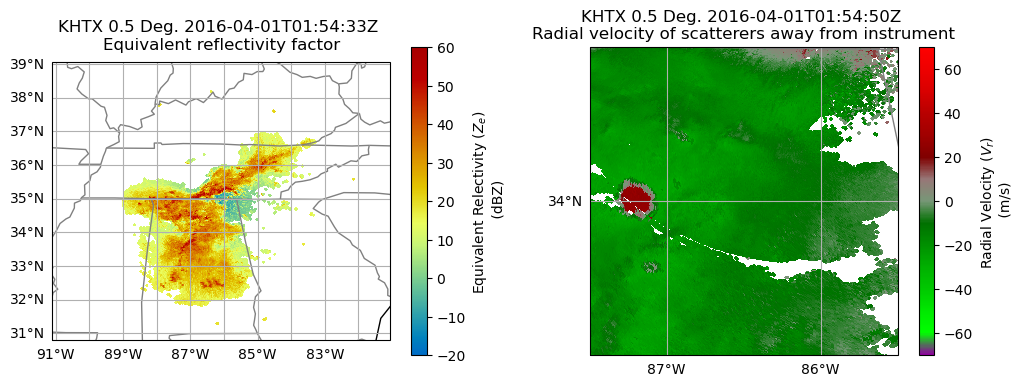

In [40]:
fig = plt.figure(figsize=(12, 4))
display1 = pyart.graph.RadarMapDisplay(radar1)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

display1.plot_ppi_map(
    "reflectivity",
    sweep=0,
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

ax = plt.subplot(122, projection=ccrs.PlateCarree())

display1.plot_ppi_map(
    "velocity",
    sweep=1,
    ax=ax,
    colorbar_label="Radial Velocity ($V_{r}$) \n (m/s)",
    vmin=-70,
    vmax=70,
    min_lon=-87.5,
    max_lon=-85.5,
    min_lat=33,
    max_lat=35,
    cmap='pyart_NWSVel'
)

### Trying another file with much more pronounced purple haze

/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)


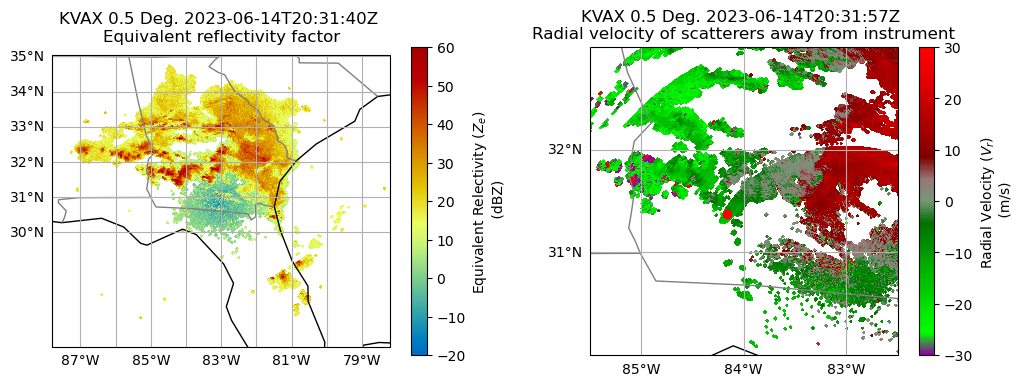

In [101]:
aws_nexrad_level2_file = (
    "s3://noaa-nexrad-level2/2023/06/14/KVAX/KVAX20230614_203140_V06"
)

    
radar = pyart.io.read_nexrad_archive(aws_nexrad_level2_file)


fig = plt.figure(figsize=(12, 4))
display = pyart.graph.RadarMapDisplay(radar)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

display.plot_ppi_map(
    "reflectivity",
    sweep=0,
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

ax = plt.subplot(122, projection=ccrs.PlateCarree())

display.plot_ppi_map(
    "velocity",
    sweep=1,
    ax=ax,
    colorbar_label="Radial Velocity ($V_{r}$) \n (m/s)",
    vmin=-30,
    vmax=30,
    min_lon=-85.5,
    max_lon=-82.5,
    min_lat=30,
    max_lat=33,
    cmap='pyart_NWSVel'
)


display.plot_point(-84.162543,31.373395)

In [102]:
dealias_radar = pyart.correct.dealias_region_based(radar,ref_vel_field='reflectivity',nyquist_vel=32.62,vel_field='velocity',corr_vel_field='dealias_vel',interval_splits=5)



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        14982     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54864D+06    |proj g|=  6.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
14982      0      1      0     0     0   6.000D+00   6.549D+06
  F =   6548643.9556390503     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        12655     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.1

/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/pyart/correct/region_dealias.py:287: UserWarning: Velocities outside of the Nyquist interval found in sweep 18.
  warnings.warn(msg, UserWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2152     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09359D+05    |proj g|=  6.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2152      0      1      0     0     0   6.000D+00   8.094D+05
  F =   809359.11101308465     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/pyart/correct/region_dealias.py:287: UserWarning: Velocities outside of the Nyquist interval found in sweep 19.
  warnings.warn(msg, UserWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1877     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09307D+05    |proj g|=  6.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 1877      0      1      0     0     0   6.000D+00   7.093D+05
  F =   709307.28831224493     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1846     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.7

In [103]:
radar.add_field_like('velocity','dealiased_velocity',dealias_radar['data'])

/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)


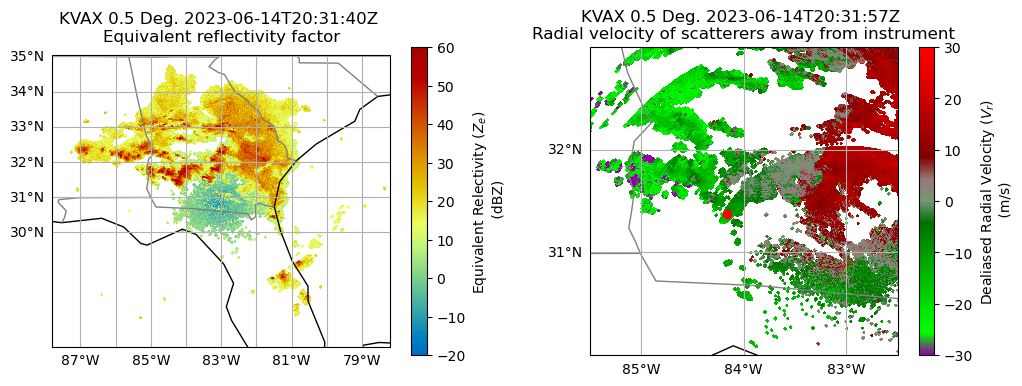

In [104]:
fig = plt.figure(figsize=(12, 4))
display = pyart.graph.RadarMapDisplay(radar)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

display.plot_ppi_map(
    "reflectivity",
    sweep=0,
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

ax = plt.subplot(122, projection=ccrs.PlateCarree())

display.plot_ppi_map(
    "dealiased_velocity",
    sweep=1,
    ax=ax,
    colorbar_label="Dealiased Radial Velocity ($V_{r}$) \n (m/s)",
    vmin=-30,
    vmax=30,
    min_lon=-85.5,
    max_lon=-82.5,
    min_lat=30,
    max_lat=33,
    cmap='pyart_NWSVel'
)


display.plot_point(-84.162543,31.373395)

In [105]:
radar1 = processorCorrect.errorCorrect(radar,velField = 'dealiased_velocity',fnyq = 44.28,nyqL=8.87,nyqH=35.41,method = 'staggered')

/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:411: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:416: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


TOTAL TIME 253.00


/Users/ms/mambaforge/envs/radar-cookbook-dev/lib/python3.9/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)


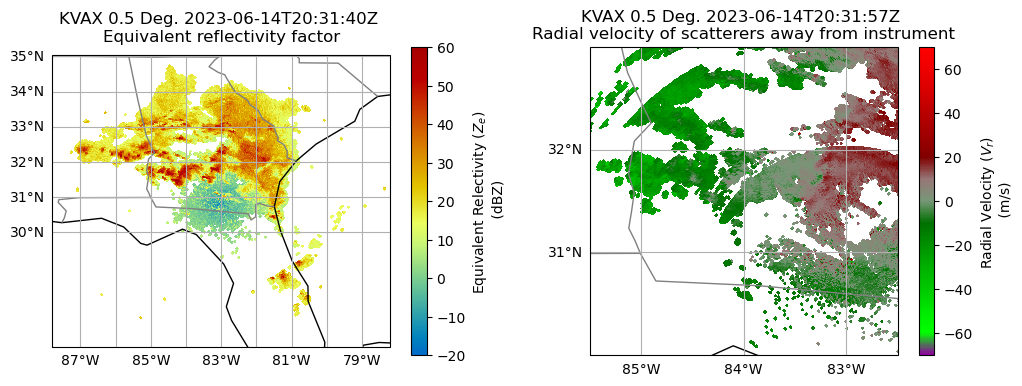

In [111]:
fig = plt.figure(figsize=(12, 4))
display1 = pyart.graph.RadarMapDisplay(radar1)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

display1.plot_ppi_map(
    "reflectivity",
    sweep=0,
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

ax = plt.subplot(122, projection=ccrs.PlateCarree())

display1.plot_ppi_map(
    "dealiased_velocity",
    sweep=1,
    ax=ax,
    colorbar_label="Radial Velocity ($V_{r}$) \n (m/s)",
    vmin=-70,
    vmax=70,
    min_lon=-85.5,
    max_lon=-82.5,
    min_lat=30,
    max_lat=33,
    cmap='pyart_NWSVel'
)

## Resources and References
* [NOAA NEXRAD on AWS](https://registry.opendata.aws/noaa-nexrad/)
* [Read NEXRAD on AWS](https://arm-doe.github.io/pyart/examples/io/plot_nexrad_data_aws.html#sphx-glr-examples-io-plot-nexrad-data-aws-py)
* Py-ART:
    - Helmus, J.J. & Collis, S.M., (2016). The Python ARM Radar Toolkit (Py-ART), a Library for Working with Weather Radar Data in the Python Programming Language. Journal of Open Research Software. 4(1), p.e25. DOI: http://doi.org/10.5334/jors.119
* Processor error correction techniques:
    - Alford, A. A., M. I. Biggerstaff, C. L. Ziegler, D. P. Jorgensen, and G. D. Carrie, 2022: A method for correcting staggered pulse repetition time and dual repetition frequency processor errors in research radar datasets. Journal of Atmospheric and Oceanic Technology, 39, 1763–1780, https://doi.org/10.1175/JTECH-D-21-0176.1.